In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [128]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(  rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,                # Applying these all Data Augmentations
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')  # randomly flip images

test_datagen = ImageDataGenerator(rescale = 1./255)

In [162]:
x_train = train_datagen.flow_from_directory(r"C:\Users\krishna vamsi\Desktop\Project\Dataset\Train",target_size = (64,64),batch_size = 32)
x_test = test_datagen.flow_from_directory(r"C:\Users\krishna vamsi\Desktop\Project\Dataset\Test",target_size = (64,64),batch_size = 32,shuffle=False)

Found 245 images belonging to 3 classes.
Found 53 images belonging to 3 classes.


In [130]:
x_train.class_indices

{'Normalweight': 0, 'Overweight': 1, 'Underweight': 2}

In [131]:
model = Sequential()

In [132]:
model.add(Conv2D(32,(3,3),input_shape = (64,64,3),activation = "relu"))

In [133]:
model.add(MaxPool2D(pool_size = (2,2)))

In [134]:
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())


In [135]:
model.add(Dropout(0.4))

In [136]:
model.add(Flatten())

In [137]:
model.add(Dense(units =128, init = "uniform",activation = "relu"))

C:\Users\krishna vamsi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [138]:
#model.add(Dense(units =100 , init = "uniform",activation = "relu"))

In [139]:
model.add(Dense(units = 3 , init = "uniform",activation = "softmax"))

C:\Users\krishna vamsi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3, activation="softmax", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [140]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 31, 31, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)          0         
__________

In [141]:
opt = Adam(0.00001)
model.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics = ["accuracy"])

In [142]:
history=model.fit_generator( )

Epoch 1/500
16/16 [==============================] - 17s 1s/step - loss: 1.0985 - acc: 0.3444 - val_loss: 1.1014 - val_acc: 0.2642
Epoch 2/500
16/16 [==============================] - 16s 987ms/step - loss: 1.0952 - acc: 0.3552 - val_loss: 1.1012 - val_acc: 0.2642
Epoch 3/500
16/16 [==============================] - 17s 1s/step - loss: 1.0940 - acc: 0.3512 - val_loss: 1.1010 - val_acc: 0.2642
Epoch 4/500
16/16 [==============================] - 16s 974ms/step - loss: 1.0951 - acc: 0.3464 - val_loss: 1.1006 - val_acc: 0.2642
Epoch 5/500
16/16 [==============================] - 16s 1s/step - loss: 1.0935 - acc: 0.3512 - val_loss: 1.1004 - val_acc: 0.2642
Epoch 6/500
16/16 [==============================] - 16s 1s/step - loss: 1.0929 - acc: 0.3435 - val_loss: 1.1002 - val_acc: 0.2642
Epoch 7/500
16/16 [==============================] - 16s 995ms/step - loss: 1.0941 - acc: 0.3463 - val_loss: 1.0998 - val_acc: 0.2642
Epoch 8/500
16/16 [==============================] - 16s 1s/step - loss: 1

16/16 [==============================] - 13s 797ms/step - loss: 0.7016 - acc: 0.7192 - val_loss: 0.6471 - val_acc: 0.7736
Epoch 123/500
16/16 [==============================] - 12s 764ms/step - loss: 0.7203 - acc: 0.7290 - val_loss: 0.6414 - val_acc: 0.7736
Epoch 124/500
16/16 [==============================] - 14s 854ms/step - loss: 0.7113 - acc: 0.7172 - val_loss: 0.6475 - val_acc: 0.7736
Epoch 125/500
16/16 [==============================] - 14s 859ms/step - loss: 0.7032 - acc: 0.7240 - val_loss: 0.6398 - val_acc: 0.7736
Epoch 126/500
16/16 [==============================] - 13s 802ms/step - loss: 0.6909 - acc: 0.7397 - val_loss: 0.6444 - val_acc: 0.7736
Epoch 127/500
16/16 [==============================] - 12s 768ms/step - loss: 0.7178 - acc: 0.7192 - val_loss: 0.6338 - val_acc: 0.7736
Epoch 128/500
16/16 [==============================] - 13s 800ms/step - loss: 0.7002 - acc: 0.7289 - val_loss: 0.6451 - val_acc: 0.7736
Epoch 129/500
16/16 [==============================] - 13s 802

16/16 [==============================] - 16s 1s/step - loss: 0.6403 - acc: 0.7534 - val_loss: 0.6196 - val_acc: 0.7736
Epoch 243/500
16/16 [==============================] - 16s 971ms/step - loss: 0.6383 - acc: 0.7486 - val_loss: 0.6185 - val_acc: 0.7736
Epoch 244/500
16/16 [==============================] - 15s 933ms/step - loss: 0.6518 - acc: 0.7309 - val_loss: 0.6226 - val_acc: 0.7736
Epoch 245/500
16/16 [==============================] - 15s 939ms/step - loss: 0.6414 - acc: 0.7417 - val_loss: 0.6147 - val_acc: 0.7925
Epoch 246/500
16/16 [==============================] - 15s 919ms/step - loss: 0.6604 - acc: 0.7417 - val_loss: 0.6231 - val_acc: 0.7736
Epoch 247/500
16/16 [==============================] - 15s 941ms/step - loss: 0.6474 - acc: 0.7486 - val_loss: 0.6102 - val_acc: 0.7925
Epoch 248/500
16/16 [==============================] - 16s 980ms/step - loss: 0.6528 - acc: 0.7388 - val_loss: 0.6219 - val_acc: 0.7736
Epoch 249/500
16/16 [==============================] - 15s 926ms/

16/16 [==============================] - 12s 746ms/step - loss: 0.6235 - acc: 0.7427 - val_loss: 0.5992 - val_acc: 0.7925
Epoch 363/500
16/16 [==============================] - 12s 750ms/step - loss: 0.6201 - acc: 0.7368 - val_loss: 0.5929 - val_acc: 0.7925
Epoch 364/500
16/16 [==============================] - 12s 774ms/step - loss: 0.6140 - acc: 0.7514 - val_loss: 0.6048 - val_acc: 0.7925
Epoch 365/500
16/16 [==============================] - 12s 747ms/step - loss: 0.6112 - acc: 0.7632 - val_loss: 0.5964 - val_acc: 0.7925
Epoch 366/500
16/16 [==============================] - 12s 760ms/step - loss: 0.6242 - acc: 0.7379 - val_loss: 0.6082 - val_acc: 0.8113
Epoch 367/500
16/16 [==============================] - 12s 749ms/step - loss: 0.6137 - acc: 0.7447 - val_loss: 0.6000 - val_acc: 0.8113
Epoch 368/500
16/16 [==============================] - 12s 762ms/step - loss: 0.6435 - acc: 0.7397 - val_loss: 0.6013 - val_acc: 0.8113
Epoch 369/500
16/16 [==============================] - 12s 751

16/16 [==============================] - 12s 724ms/step - loss: 0.5892 - acc: 0.7544 - val_loss: 0.5921 - val_acc: 0.7925
Epoch 483/500
16/16 [==============================] - 11s 713ms/step - loss: 0.6168 - acc: 0.7446 - val_loss: 0.5977 - val_acc: 0.8113
Epoch 484/500
16/16 [==============================] - 11s 705ms/step - loss: 0.6319 - acc: 0.7437 - val_loss: 0.5854 - val_acc: 0.7925
Epoch 485/500
16/16 [==============================] - 11s 717ms/step - loss: 0.5973 - acc: 0.7495 - val_loss: 0.5963 - val_acc: 0.8113
Epoch 486/500
16/16 [==============================] - 11s 704ms/step - loss: 0.6037 - acc: 0.7681 - val_loss: 0.5934 - val_acc: 0.8113
Epoch 487/500
16/16 [==============================] - 11s 712ms/step - loss: 0.5977 - acc: 0.7613 - val_loss: 0.5912 - val_acc: 0.7925
Epoch 488/500
16/16 [==============================] - 11s 713ms/step - loss: 0.6212 - acc: 0.7397 - val_loss: 0.5947 - val_acc: 0.8113
Epoch 489/500
16/16 [==============================] - 11s 717

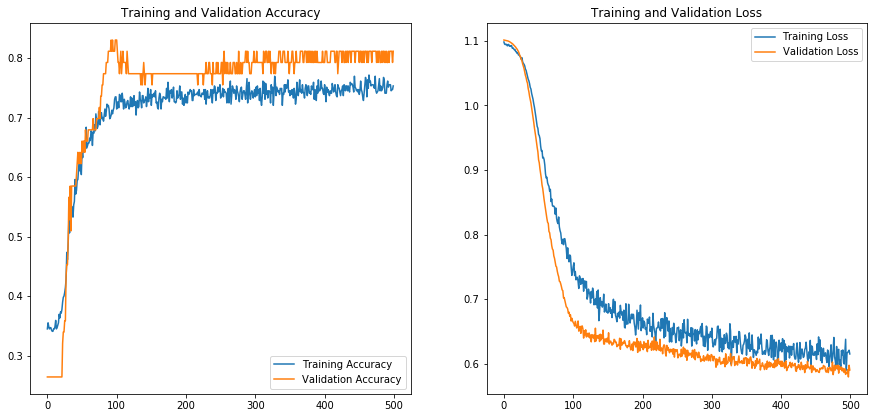

In [143]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [191]:
#validation_generator = test_datagen.flow_from_directory(r"C:\Users\krishna vamsi\Desktop\Project\Dataset\Test",
#                                                        target_size=(64,64),
#                                                        batch_size=32,
#                                                        class_mode='categorical',shuffle=False)

Found 53 images belonging to 3 classes.


In [207]:
#Confusion Matrix 
pred = model.predict_generator(x_test,53 // 32+1)
y_pred = np.argmax(pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(x_test.classes, y_pred))

Confusion Matrix
[[13  0  1]
 [ 1 16  2]
 [ 3  3 14]]


In [212]:
#Accuracy,specificity and Sensitivity
cn=confusion_matrix(x_test.classes, y_pred)
total=sum(sum(cn))
print('Confusion Matrix')
print(confusion_matrix(x_test.classes, y_pred))
accuracy1=(cn[0,0]+cn[1,1]+cn[2,2])/total
print ('Accuracy : ', accuracy1)

sensitivity = cn[0,0]/(cn[0,0]+cn[0,1]+cn[0,2])
print('Sensitivity : ', sensitivity )

specificity1 = (cn[1,1]+cn[2,2])/(cn[1,0]+cn[2,1]+cn[1,1]+cn[2,2])
print('Specificity : ', specificity1)

Confusion Matrix
[[13  0  1]
 [ 1 16  2]
 [ 3  3 14]]
Accuracy :  0.8113207547169812
Sensitivity :  0.9285714285714286
Specificity :  0.8823529411764706


In [211]:
#Classification Report
print('Classification Report')
target_names = ['Normalweight', 'Overweight', 'Underweight']
print(classification_report(x_test.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

Normalweight       0.76      0.93      0.84        14
  Overweight       0.84      0.84      0.84        19
 Underweight       0.82      0.70      0.76        20

    accuracy                           0.81        53
   macro avg       0.81      0.82      0.81        53
weighted avg       0.81      0.81      0.81        53



In [203]:
model.save('bmi_cnn_new.h5')